In [1]:
import pandas as pd
import numpy as np

# Lista de dados fornecidos
dados_nao_ordenado = [
    1.649, 1.470, 3.035, 3.706, 1.212, 2.041, 0.711, 1.520, 14.989, 19.103, 0.982, 10.229, 2.768, 2.107,
    0.426, 0.077, 3.049, 9.198, 3.967, 2.549, 6.394, 0.030, 1.479, 6.193, 3.201, 0.735, 5.298, 5.519,
    7.620, 5.263, 2.264, 7.834, 7.486, 0.385, 8.595, 2.147, 1.069, 3.202, 7.495, 3.284, 3.060, 2.165,
    13.553, 5.424, 6.725, 3.027, 4.048, 0.607, 2.658, 1.750, 1.190, 2.193, 8.103, 0.865, 0.016, 1.185,
    2.602, 0.056, 3.491, 1.167, 8.375, 4.116, 3.323, 1.056
]

# Lista dos dados ordenados
dados_ordenado = sorted(dados_nao_ordenado)

df = pd.DataFrame(dados_ordenado, columns=['Valores'])

print(df.head())

   Valores
0    0.016
1    0.030
2    0.056
3    0.077
4    0.385


In [2]:
media = df['Valores'].mean()

mediana = df['Valores'].median()

variancia = df['Valores'].var()

desvio_padrão = df['Valores'].std()

min = df['Valores'].min()

max = df['Valores'].max()

quartis = df['Valores'].quantile([0.25,0.5,0.75])

print(f"Media = {media:.2f} dias")
print(f"Mediana = {mediana:.2f} dias")
print(f"Variancia = {variancia:.2f} dias\u00B2")
print(f"Desvio Padrão = {desvio_padrão:.2f} dias")
print(f"Min = {min:.4f} dias")
print(f"Max = {max:.2f} dias")
print(f"Quartis = {quartis}")


Media = 3.92 dias
Mediana = 2.90 dias
Variancia = 14.18 dias²
Desvio Padrão = 3.77 dias
Min = 0.0160 dias
Max = 19.10 dias
Quartis = 0.25    1.20650
0.50    2.89750
0.75    5.44775
Name: Valores, dtype: float64


c:\Users\Pedro\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


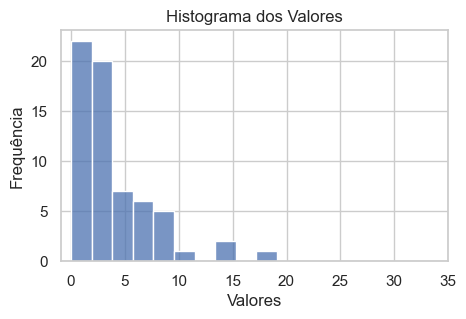

c:\Users\Pedro\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


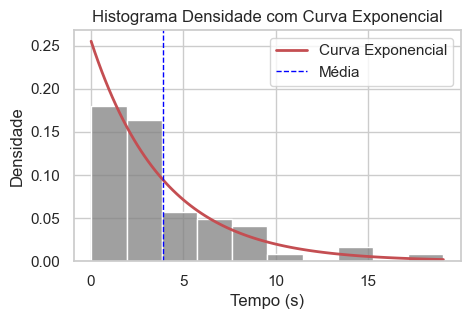

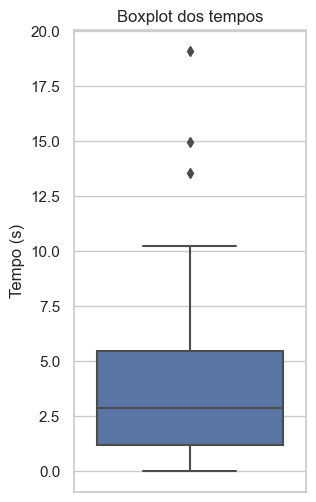

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon

# Calculando a média
media = df['Valores'].mean()

# Ajustar a distribuição exponencial aos dados da coluna 'Valores'
loc, scale = expon.fit(df['Valores'], floc=0)  # fixando loc = 0
x = np.linspace(0, df['Valores'].max(), 100)
y = expon.pdf(x, loc, scale)

# Configurando estilo de exibição do Seaborn
sns.set(style="whitegrid")

#Histrograma sem linha de densidade e com frêquencia
plt.figure(figsize=(5, 3))
sns.histplot(df['Valores'], kde=False)
plt.title('Histograma dos Valores')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.xticks(np.arange(0, 40, 5))
plt.show()

# Histograma com KDE e linha vertical para a média
plt.figure(figsize=(5, 3))
sns.histplot(df['Valores'], kde=False, color='gray', stat='density')
plt.plot(x, y, 'r-', lw=2, label='Curva Exponencial')
plt.axvline(media, color='blue', linestyle='dashed', linewidth=1, label='Média')
plt.title('Histograma Densidade com Curva Exponencial')
plt.xlabel('Tempo (s)')
plt.ylabel('Densidade')
plt.xticks(np.arange(0, 20, 5))
plt.legend()
plt.show()

# Boxplot
plt.figure(figsize=(3, 6))
sns.boxplot(y=df['Valores'])
plt.title('Boxplot dos tempos')
plt.ylabel('Tempo (s)')
plt.yticks(np.arange(0, 22.5, 2.5))
plt.show()

In [4]:
import scipy.stats as stats


dados_np = np.array(df)

media_np = np.mean(dados_np)

dp_np = np.std(dados_np, ddof=1)

n = len(dados_np)

conf = 0.95
df = n - 1

print(f"Media pontual: {media:.2f} dias")
print()

intervalo_t = stats.norm.interval(conf, loc=media_np, scale=dp_np/np.sqrt(n))
print(f"Intervalo de confiança para a média ({conf*100}%) aproximadamente: ({intervalo_t[0]:.4f}, {intervalo_t[1]:.3f}) dias")

# Calculando o valor crítico z para o nível de confiança
alpha = 1 - conf
z_critico = stats.norm.ppf(1 - alpha/2)

# Calculando o intervalo de confiança para o desvio padrão
lower_bound = dp_np / (1 + (z_critico / np.sqrt(2*n)))
upper_bound = dp_np * (1 + (z_critico / np.sqrt(2*n)))

print()
print(f"Desvio padrão pontual: {desvio_padrão:.2f} dias")
print(f"Intervalo de confiança para o desvio padrão ({conf*100}%) aproximadamente: ({lower_bound:.2f}, {upper_bound:.2f}) dias")



Media pontual: 3.92 dias

Intervalo de confiança para a média (95.0%) aproximadamente: (2.9999, 4.845) dias

Desvio padrão pontual: 3.77 dias
Intervalo de confiança para o desvio padrão (95.0%) aproximadamente: (3.21, 4.42) dias


In [5]:
lambda_possoin = 1/media

print(f"A distribuição estimada (Seguindo uma distribuição de Poisson) para t > 0 é: Nt ~ ({lambda_possoin:.2}t)")
print()
print(f"A distribuição Tk (Seguindo uma distribuição gama) pode ser estimada para todo k = 1,2,3... por: Tk ~(k,{lambda_possoin:.2})")


A distribuição estimada (Seguindo uma distribuição de Poisson) para t > 0 é: Nt ~ (0.25t)

A distribuição Tk (Seguindo uma distribuição gama) pode ser estimada para todo k = 1,2,3... por: Tk ~(k,0.25)


In [6]:
# (a) A intensidade do processo de alterações (λ)
intensidade = lambda_possoin
print(f"Intensidade do processo (λ): {intensidade:.2}")

# (b) O tempo médio entre alterações (μ)
tempo_medio = media
print(f"Tempo médio entre alterações (μ): {tempo_medio:.3}")

# (c) Probabilidade de duas ou mais mudanças em um dia (Poisson com t=1)
prob_2_ou_mais = 1 - stats.poisson.cdf(1, intensidade * 1)
print(f"Probabilidade de duas ou mais mudanças em um dia: {prob_2_ou_mais * 100:.3}%")

# (d) Probabilidade de não haver alterações em cinco dias (Poisson com t=5)
prob_0_em_5_dias = stats.poisson.pmf(0, intensidade * 5)
print(f"Probabilidade de não haver alterações em cinco dias: {prob_0_em_5_dias * 100:.3}%")

# (e) Probabilidade de duas ou menos mudanças em cinco dias (Poisson com t=5)
prob_2_ou_menos_em_5_dias = stats.poisson.cdf(2, intensidade * 5)
print(f"Probabilidade de duas ou menos mudanças em cinco dias: {prob_2_ou_menos_em_5_dias *100:.3}%")

Intensidade do processo (λ): 0.25
Tempo médio entre alterações (μ): 3.92
Probabilidade de duas ou mais mudanças em um dia: 2.75%
Probabilidade de não haver alterações em cinco dias: 28.0%
Probabilidade de duas ou menos mudanças em cinco dias: 86.3%
